In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score,cross_validate
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


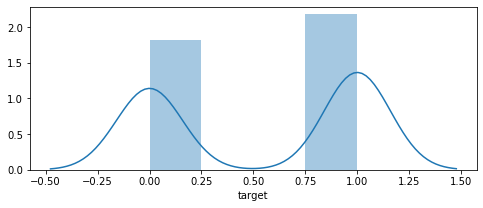

In [3]:
plt.figure(figsize=(8,3))
sns.distplot(df['target'])
plt.show()

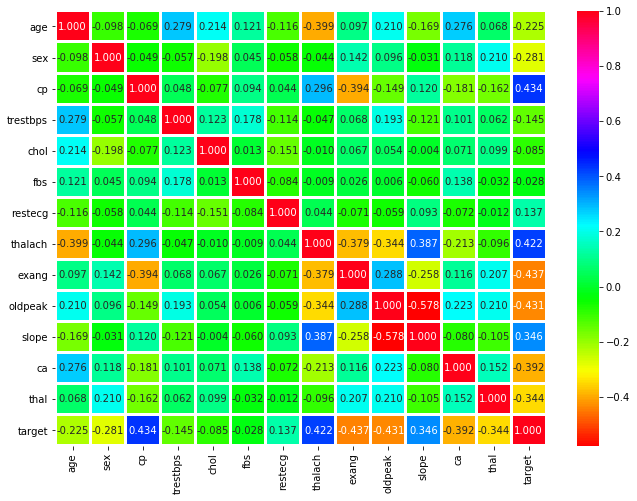

In [4]:
plt.figure(figsize=(11,8))
sns.heatmap(df.corr(),annot=True,cmap="hsv",fmt=".3f",linewidths="2")
plt.show()

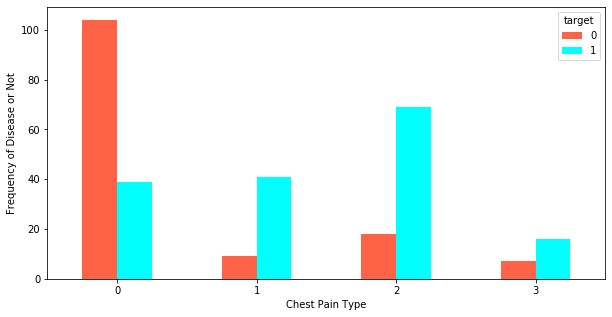

In [5]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,5),color=['tomato','cyan' ])
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

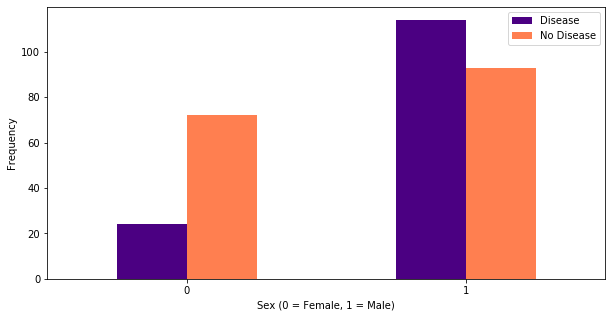

In [6]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(10,5),color=['indigo','coral' ])
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Disease", "No Disease"])
plt.ylabel('Frequency')
plt.show()

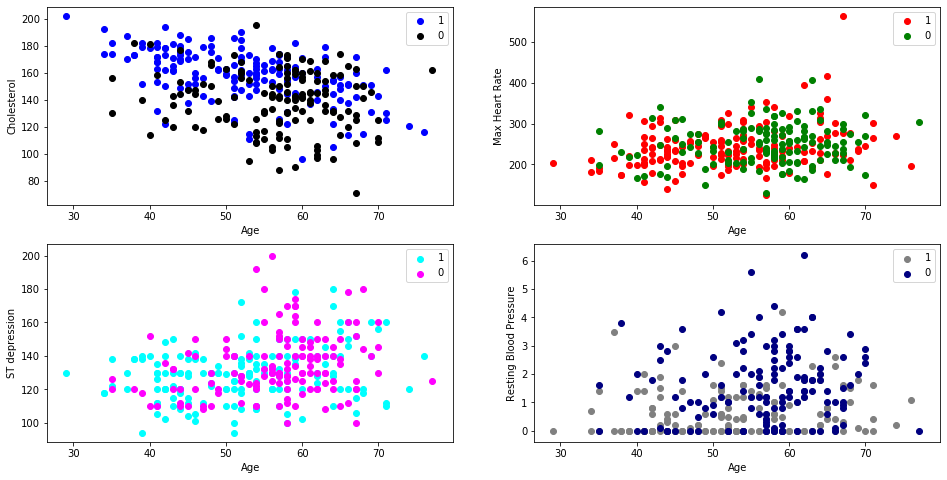

In [7]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.scatter(x=df.age[df.target==1],y=df.thalach[df.target==1],c='blue')
plt.scatter(x=df.age[df.target==0],y=df.thalach[df.target==0],c='black')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(['1','0'])

plt.subplot(2,2,2)
plt.scatter(x=df.age[df.target==1],y=df.chol[df.target==1],c='red')
plt.scatter(x=df.age[df.target==0],y=df.chol[df.target==0],c='green')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['1','0'])

plt.subplot(2,2,3)
plt.scatter(x=df.age[df.target==1],y=df.trestbps[df.target==1],c='cyan')
plt.scatter(x=df.age[df.target==0],y=df.trestbps[df.target==0],c='fuchsia')
plt.xlabel('Age')
plt.ylabel('ST depression')
plt.legend(['1','0'])

plt.subplot(2,2,4)
plt.scatter(x=df.age[df.target==1],y=df.oldpeak[df.target==1],c='grey')
plt.scatter(x=df.age[df.target==0],y=df.oldpeak[df.target==0],c='navy')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.legend(['1','0'])
plt.show()

In [9]:
#USING THE DIFFERENT ALGORITHMS
X = df.drop("target", axis=1)
y = df["target"]

In [10]:
minMax = MinMaxScaler()
X = minMax.fit_transform(X)

In [11]:
#writting a function for performing cross validation for every algorithm
strat_k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
def crossValidation(M):
    strat_k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
    scoring = {"accuracy","precision","recall","f1"}
    result = cross_validate(M, X, y, cv=strat_k_fold, scoring=scoring)
    result = [result['test_accuracy'].mean(),result['test_precision'].mean(),result['test_recall'].mean(),result["test_f1"].mean()]
    return result;

In [12]:
#USING ADABOOST with tuning
model = KNeighborsClassifier()
print("KNN")
crossValidation(model)

KNN


[0.8278494623655914,
 0.8394105975723622,
 0.8547794117647058,
 0.8450685602369663]

In [13]:
model = LogisticRegression()
print("LR")
crossValidation(model)

LR


[0.8248387096774193,
 0.8168349181777975,
 0.8849264705882354,
 0.8471130221130221]

In [14]:
model = GaussianNB()
print("NB")
crossValidation(model)

NB


[0.808709677419355, 0.8194902556164166, 0.8367647058823529, 0.824648908439231]

In [15]:
model = svm.SVC()
print("SVM")
crossValidation(model)

SVM


[0.8380645161290323,
 0.8179553049289892,
 0.9150735294117647,
 0.8616634095324297]

In [16]:
model = RandomForestClassifier()
print("RF")
crossValidation(model)

RF


[0.824731182795699, 0.8200264755024816, 0.8790441176470587, 0.8467377356347946]

In [17]:
#USING ADABOOST with tuning
print("Graident Boosting")
model = GradientBoostingClassifier()
crossValidation(model)

Graident Boosting


[0.7919354838709678,
 0.7926536930561698,
 0.8419117647058822,
 0.8136288402277616]

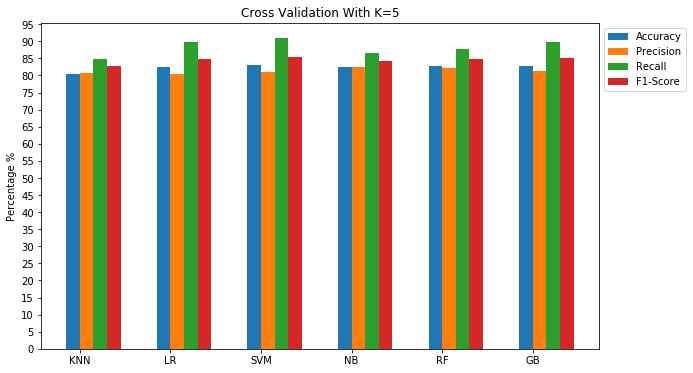

In [18]:
N=6
AC=(80.530,82.508,83.180,82.514,82.836,82.828)
PR=(80.614,80.518,80.919,82.379,82.065,81.409)
RE=[84.849,89.697,90.909,86.667,87.879,89.816]
F=[82.630,84.832,85.524,84.345,84.755,85.140]
ind = np.arange(N)
width = 0.15
plt.figure(figsize=(10,6))
plt.bar(ind,AC,width,label='Accuracy')
plt.bar(ind+width,PR,width,label='Precision')
plt.bar(ind+width+width,RE,width,label='Recall')
plt.bar(ind+width+width+width,F,width,label='F1-Score')
plt.ylabel('Percentage %')
plt.title("Cross Validation With K=5")
plt.yticks(np.arange(0,100,5))
plt.xticks(ind+width/2,('KNN','LR','SVM','NB','RF',"GB"))
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.show()

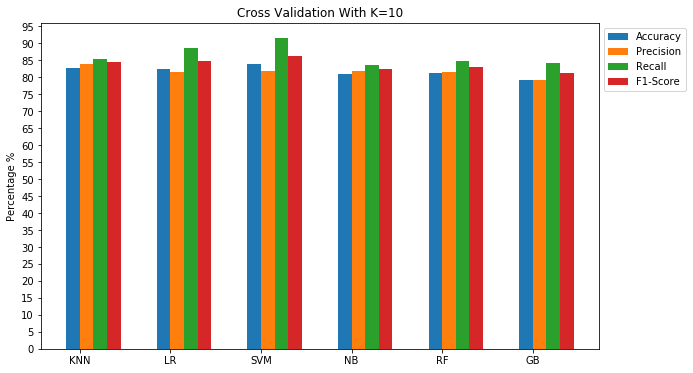

In [19]:
N=6
AC=(82.785,82.483,83.807,80.871,81.118,79.194)
PR=(83.941,81.684,81.796,81.949,81.543,79.265)
RE=(85.478,88.493,91.507,83.677,84.889,84.191)
F=(84.507,84.711,86.166,82.465,82.933,81.363)
ind = np.arange(N)
width = 0.15
plt.figure(figsize=(10,6))
plt.bar(ind,AC,width,label='Accuracy')
plt.bar(ind+width,PR,width,label='Precision')
plt.bar(ind+width+width,RE,width,label='Recall')
plt.bar(ind+width+width+width,F,width,label='F1-Score')
plt.ylabel('Percentage %')
plt.title("Cross Validation With K=10")
plt.yticks(np.arange(0,100,5))
plt.xticks(ind+width/2,('KNN','LR','SVM','NB','RF',"GB"))
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.show()